<a href="https://colab.research.google.com/github/JAVillarino/Ecoficiency/blob/main/Ecoficiency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Cleaning and Import**

In [95]:
#Import Statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import geopandas as gpd

In [77]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Data Preprocessing**

In [78]:
#READ IN THE DATA
train_df = pd.read_csv("train.csv")
#CLEAN THE DATA
train_df.dropna(inplace = True)
train_df.head()

,Unnamed: 0,MSN,StateCode,Year,Amount,State,CO2 Emissions (Mmt),TotalNumberofInvestments,TotalAmountofAssistance
0,0,BDFDB,AK,2015,21.0,Alaska,35.027804,16.0,3345612.0
1,1,BDPRP,AK,2015,4.0,Alaska,35.027804,16.0,3345612.0
2,2,BFFDB,AK,2015,21.0,Alaska,35.027804,16.0,3345612.0
3,3,BFPRP,AK,2015,4.0,Alaska,35.027804,16.0,3345612.0
4,4,CLPRB,AK,2015,17747.0,Alaska,35.027804,16.0,3345612.0


In [79]:
#Statecodes is a list of the unique state codes
statecodes = train_df["StateCode"].unique()

# **Data Visualization**

**Investments by State Over Time**

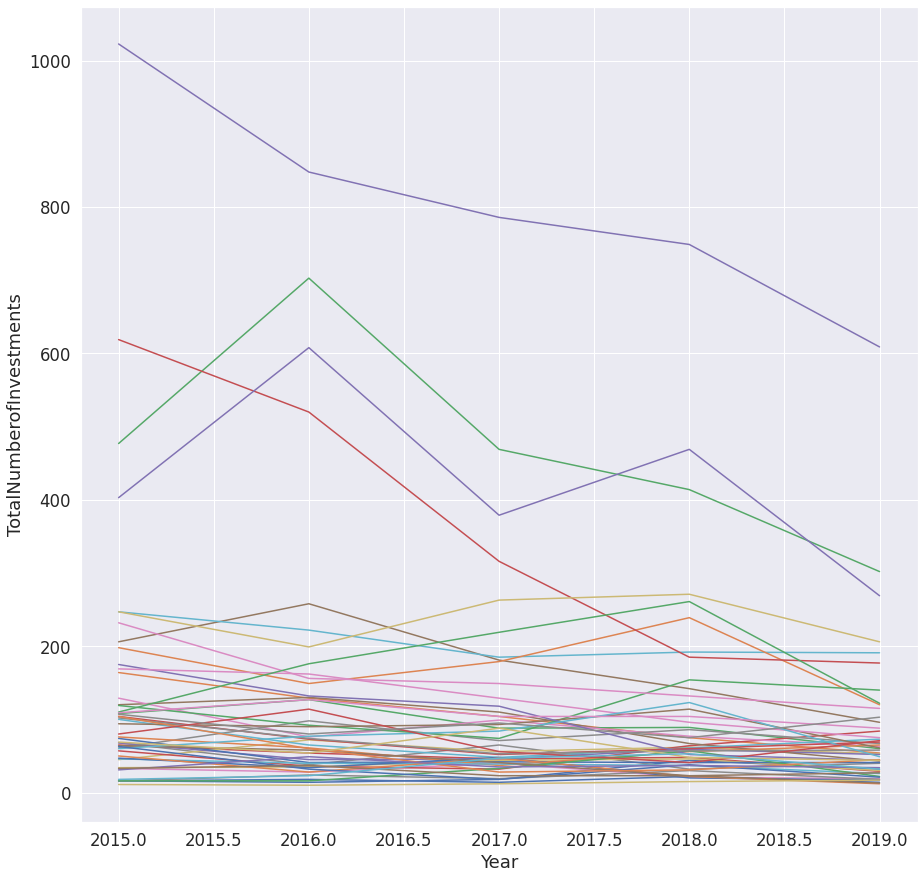

In [80]:
invdata = train_df[["State", "Year", "TotalNumberofInvestments"]].drop_duplicates()
plt.figure(figsize=(15,15))
sns.set(font_scale=1.5)
for state in invdata["State"].unique():
  sns.lineplot(data = invdata.query("State == @state"), x = "Year" , y = "TotalNumberofInvestments")

**Assistance by State Over Time**

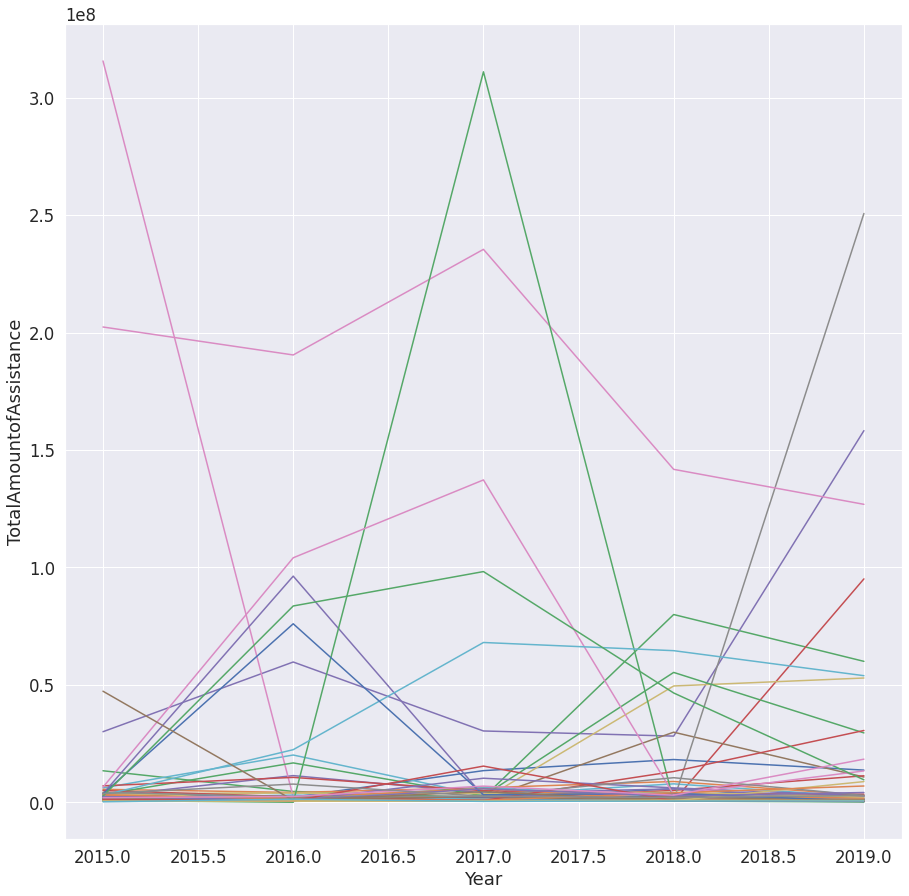

In [81]:
astdata = train_df[["State", "Year", "TotalAmountofAssistance"]].drop_duplicates()
plt.figure(figsize=(15,15))
sns.set(font_scale=1.5)
for state in astdata["State"].unique():
  sns.lineplot(data = astdata.query("State == @state"), x = "Year" , y = "TotalAmountofAssistance")

### **Average Assistance by Region Over Time**

          South     Northeast       Midwest          West
0  3.537550e+07  7.572157e+06  3.350347e+06  4.038425e+06
1  2.702548e+07  1.385608e+06  1.134981e+07  1.388795e+07
2  2.712308e+07  2.182642e+06  3.526594e+06  4.057656e+07
3  2.574984e+07  3.735837e+06  8.129043e+06  7.323791e+06
4  3.603194e+07  5.424322e+06  5.135232e+06  2.417344e+07


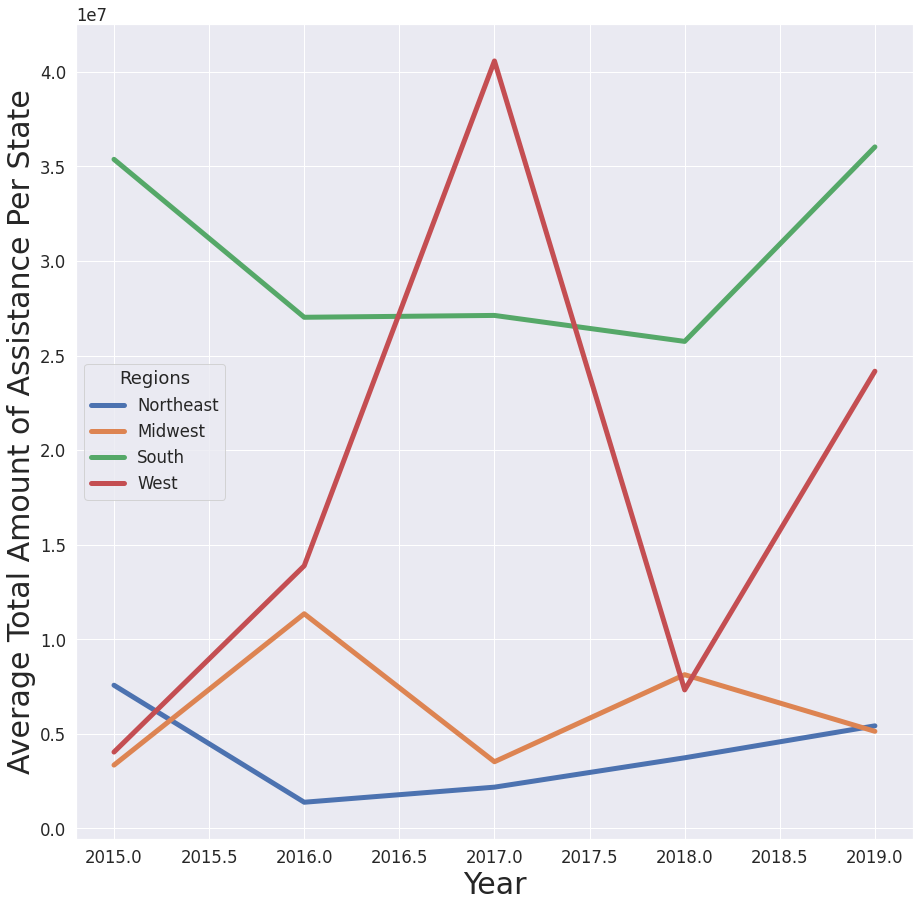

In [82]:
regions = ['Northeast', 'Midwest', 'South', 'West']
northeast = ['Maine', 'Connecticut', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New Jersey', 'New York', 'Pennsylvania']
midwest = ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota']
south = ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas']
west = ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming', 'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington']
avgs = pd.DataFrame()
avgs['South'] = [0, 0, 0, 0, 0]
avgs['Northeast'] = [0, 0, 0, 0, 0]
avgs['Midwest'] = [0, 0, 0, 0, 0]
avgs['West'] = [0, 0, 0, 0, 0]

astdata = train_df[["State", "Year", "TotalAmountofAssistance"]].drop_duplicates()
plt.figure(figsize=(15,15))
sns.set(font_scale=1.5)
for state in astdata["State"].unique():
  if state in south:
    for i in range(5):
      avgs['South'][i] += astdata.query('State == @state')['TotalAmountofAssistance'].tolist()[i]
  if state in northeast:
    for i in range(5):
      avgs['Northeast'][i] += astdata.query('State == @state')['TotalAmountofAssistance'].tolist()[i]
  if state in midwest:
    for i in range(5):
      avgs['Midwest'][i] += astdata.query('State == @state')['TotalAmountofAssistance'].tolist()[i]
  if state in west:
    for i in range(5):
      avgs['West'][i] += astdata.query('State == @state')['TotalAmountofAssistance'].tolist()[i]

avgs['South'] = avgs['South'] / len(south)
avgs['Midwest'] = avgs['Midwest'] / len(midwest)
avgs['Northeast'] = avgs['Northeast'] / len(northeast)
avgs['West'] = avgs['West'] / len(west)

print(avgs)
for region in regions:
  plot = sns.lineplot(data = avgs, x = [2015,2016,2017,2018,2019], y = avgs[region], linewidth = 5, label = region)

plt.xlabel('Year', fontsize = 30)
plt.ylabel('Average Total Amount of Assistance Per State', fontsize = 30)

plt.legend(loc='', title='Regions')

plt.show()

**Check Arbitrary State**

In [83]:
state = "Tennessee"
print(astdata.query("State == @state"))
print(invdata.query("State == @state"))

          State  Year  TotalAmountofAssistance
1218  Tennessee  2015                3275928.0
2737  Tennessee  2016                1102457.0
4256  Tennessee  2017                 889496.0
5775  Tennessee  2018                4038180.0
7294  Tennessee  2019                6964195.0
          State  Year  TotalNumberofInvestments
1218  Tennessee  2015                     104.0
2737  Tennessee  2016                      60.0
4256  Tennessee  2017                      28.0
5775  Tennessee  2018                      31.0
7294  Tennessee  2019                      45.0


**Compare the assistance for two given states over time**

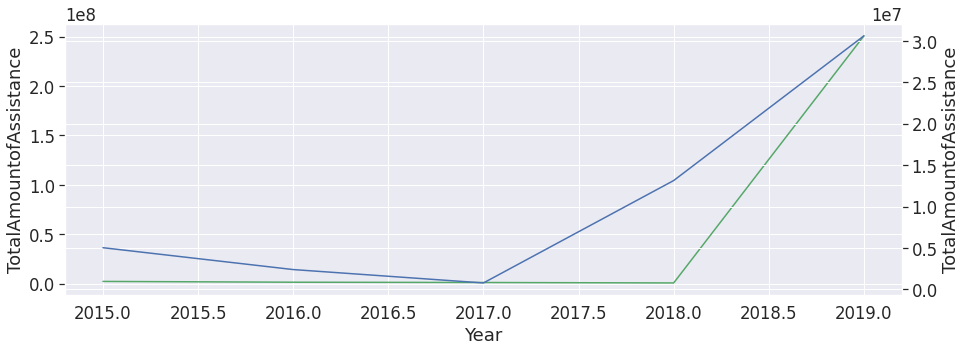

In [84]:
s1 = "Louisiana"
s2 = "New York"
astdata = train_df[["State", "Year", "TotalAmountofAssistance"]].drop_duplicates()
plt.figure(figsize=(15,5))
sns.set(font_scale=1.5)
assistanceKY = sns.lineplot(data = astdata.query("State == @s1"), x = "Year" , y = "TotalAmountofAssistance", color = "g")
assistanceNY = sns.lineplot(data = astdata.query("State == @s2"), x = "Year" , y = "TotalAmountofAssistance",ax=assistanceKY.axes.twinx(), color = "b")

In [85]:
#Correlation in 2018 and 2019 between Investment and Assistance
correlationlist = []
for state in train_df["State"].unique():
    smallframe = train_df.query("State == @state")[["TotalAmountofAssistance","TotalNumberofInvestments"]]
    #print(smallframe.drop_duplicates())
    correlation = smallframe.corr("pearson")
    cnum = correlation._get_value("TotalAmountofAssistance","TotalNumberofInvestments")
    correlationlist.append(cnum)
print("AVG to 19: ", np.average(correlationlist))
print("STD to 19: ", np.std(correlationlist))

correlationlist = []
for state in train_df["State"].unique():
    smallframe = train_df.query("State == @state and Year < 2019")[["TotalAmountofAssistance","TotalNumberofInvestments"]]
    #print(smallframe.drop_duplicates())
    correlation = smallframe.corr("pearson")
    cnum = correlation._get_value("TotalAmountofAssistance","TotalNumberofInvestments")
    correlationlist.append(cnum)
print(correlationlist)
print("AVG to 18: ", np.average(correlationlist))
print("STD to 18: ", np.std(correlationlist))


AVG to 19:  0.197100671631382
STD to 19:  0.5520655403703785
[0.8234370374608445, -0.25134465237229514, -0.5561449261163577, 0.38452212875221237, 0.012172798568140823, -0.7436666388829289, -0.7285228857039846, 0.9055422907774897, 0.20618433584306411, 0.30891982273638713, 0.7826271421431774, 0.9335316420637711, 0.4416209449959806, 0.9012157640818579, -0.6469836574437624, 0.5681343081130391, 0.9036011224246792, -0.5500453623435175, 0.45448108168818163, -0.6083384677771887, 0.5592771871815457, 0.7202362780923189, 0.8063751886325141, 0.7557943391982817, 0.9318379292597304, 0.5277004604388157, 0.3229771042904693, 0.9162833719548841, 0.058687528723738426, 0.14626013483287537, 0.4476662792319642, 0.4756041712575569, 0.08625699037942469, -0.040283431653791106, -0.4312262606952573, -0.14080827384548333, 0.15651398748178277, -0.2637296570615687, 0.5795670406596038, 0.7718697619103344, -0.20032808024433224, 0.22957354668108026, 0.5359080161244218, -0.3518509663691617, -0.5826915939668016, 0.34131

# **Data Analysis and Machine Learning**

## **Models to predict 2019 Data**

### **Neural Network - 2019**

In [86]:
from sklearn.neural_network import MLPClassifier

NN2019predictions = []

for state in statecodes:

  x = train_df.query("StateCode == @state")[["Year","MSN","Amount","TotalAmountofAssistance"]]

  x2016 = x.query("Year == 2016")["Amount"].values.tolist()
  x2017 = x.query("Year == 2017")["Amount"].values.tolist()
  x2018 = x.query("Year == 2018")["Amount"].values.tolist()
  train_X = pd.DataFrame([x2016, x2017, x2018])
  train_Y = pd.DataFrame([x.query("Year < 2019 and Year > 2015")["TotalAmountofAssistance"].unique().tolist()]).transpose()
  test_X = pd.DataFrame([x.query("Year == 2019")["Amount"].values.tolist()])
  
  mlp = MLPClassifier(hidden_layer_sizes=(29,29,29), activation='tanh', solver='lbfgs', max_iter=500)
  mlp.fit(train_X,train_Y)

  predict_train = mlp.predict(train_X)
  predict_test = mlp.predict(test_X)

  NN2019predictions.append(predict_test[0])


### **Linear Regression - 2019**

In [87]:
from sklearn.linear_model import LinearRegression

LIN2019predictions = []

for state in statecodes:
      x = train_df.query("StateCode == @state")

      train_X_INV = x.query("Year < 2019")[["TotalNumberofInvestments","Year"]].drop_duplicates(subset = 'Year')["TotalNumberofInvestments"].values.tolist()
      train_X_CO2 = x.query("Year < 2019")[["CO2 Emissions (Mmt)","Year"]].drop_duplicates(subset = 'Year')["CO2 Emissions (Mmt)"].values.tolist()

      x2015 = x.query("Year == 2015")["Amount"].values.tolist()
      x2016 = x.query("Year == 2016")["Amount"].values.tolist()
      x2017 = x.query("Year == 2017")["Amount"].values.tolist()
      x2018 = x.query("Year == 2018")["Amount"].values.tolist()
      x2019 = x.query("Year == 2019")["Amount"].values.tolist()
      train_X= pd.DataFrame([x2015, x2016, x2017, x2018])

      train_X["INV"] = train_X_INV
      train_X["CO2"] = train_X_CO2

      train_Y = pd.DataFrame([x.query("Year < 2019")["TotalAmountofAssistance"].unique().tolist()]).transpose()
      test_Y = pd.DataFrame([x.query("Year == 2019")["TotalAmountofAssistance"].unique().tolist()]).transpose()

      test_X= pd.DataFrame([x2019])
      test_X_INV = x.query("Year == 2019")["TotalNumberofInvestments"].drop_duplicates().values.tolist()
      test_X_CO2 = x.query("Year == 2019")["CO2 Emissions (Mmt)"].drop_duplicates().values.tolist()
      test_X["INV"] = test_X_INV
      test_X["CO2"] = test_X_CO2
      
      lin_model = LinearRegression()
      lin_model.fit(train_X,train_Y)
      prediction = lin_model.predict(test_X)
      LIN2019predictions.append(prediction.item(0,0))



### **Random Forest - 2019**

In [88]:
from sklearn.ensemble import RandomForestRegressor

RF2019predictions = []
for state in statecodes:
      x = train_df.query("StateCode == @state")

      train_X_INV = x.query("Year < 2019")[["TotalNumberofInvestments","Year"]].drop_duplicates(subset = 'Year')["TotalNumberofInvestments"].values.tolist()
      train_X_CO2 = x.query("Year < 2019")[["CO2 Emissions (Mmt)","Year"]].drop_duplicates(subset = 'Year')["CO2 Emissions (Mmt)"].values.tolist()

      x2015 = x.query("Year == 2015")["Amount"].values.tolist()
      x2016 = x.query("Year == 2016")["Amount"].values.tolist()
      x2017 = x.query("Year == 2017")["Amount"].values.tolist()
      x2018 = x.query("Year == 2018")["Amount"].values.tolist()
      x2019 = x.query("Year == 2019")["Amount"].values.tolist()
      train_X= pd.DataFrame([x2015, x2016, x2017, x2018])

      train_X["INV"] = train_X_INV
      train_X["CO2"] = train_X_CO2

      train_Y = pd.DataFrame([x.query("Year < 2019")["TotalAmountofAssistance"].unique().tolist()]).transpose()
      test_Y = pd.DataFrame([x.query("Year == 2019")["TotalAmountofAssistance"].unique().tolist()]).transpose()

      test_X= pd.DataFrame([x2019])
      test_X_INV = x.query("Year == 2019")["TotalNumberofInvestments"].drop_duplicates().values.tolist()
      test_X_CO2 = x.query("Year == 2019")["CO2 Emissions (Mmt)"].drop_duplicates().values.tolist()
      test_X["INV"] = test_X_INV
      test_X["CO2"] = test_X_CO2

      rf_model = RandomForestRegressor(max_depth=5, random_state=0)
      rf_model.fit(train_X, train_Y.values.ravel())
      rfpredict = rf_model.predict(test_X)
      RF2019predictions.append(rfpredict.item(0))


## **Models to predict 2020 Data**

In [89]:
test_df = pd.read_csv("test.csv")
test_df.dropna(inplace = True)

test_df.head()
test_df.shape

(1450, 9)

### **Linear Regression - 2020**

In [90]:
LIN2020predictions = []
for state in train_df["StateCode"].unique():
      #Reformat Train Data from train.cv document
      TRAIN = train_df.query("StateCode == @state")
      TEST = test_df.query("StateCode == @state")
      
      #Create columns for the investment and co2 data
      train_X_INV = TRAIN[["TotalNumberofInvestments","Year"]].drop_duplicates(subset = 'Year')["TotalNumberofInvestments"].values.tolist()
      train_X_CO2 = TRAIN[["CO2 Emissions (Mmt)","Year"]].drop_duplicates(subset = 'Year')["CO2 Emissions (Mmt)"].values.tolist()

      x2015 = TRAIN.query("Year == 2015")["Amount"].values.tolist()
      x2016 = TRAIN.query("Year == 2016")["Amount"].values.tolist()
      x2017 = TRAIN.query("Year == 2017")["Amount"].values.tolist()
      x2018 = TRAIN.query("Year == 2018")["Amount"].values.tolist()
      x2019 = TRAIN.query("Year == 2019")["Amount"].values.tolist()
      train_X= pd.DataFrame([x2015, x2016, x2017, x2018,x2019])

      #Append the INV and CO2 data to the training data
      train_X["INV"] = train_X_INV
      train_X["CO2"] = train_X_CO2

      train_Y = pd.DataFrame([TRAIN["TotalAmountofAssistance"].unique().tolist()]).transpose()

      #Reformat Test Data from the test.cv document
      x2020 = TEST["Amount"].values.tolist()

      test_Y = pd.DataFrame([TEST["TotalAmountofAssistance"].unique().tolist()]).transpose()
      test_X= pd.DataFrame([x2020])
      test_X_INV = TEST["TotalNumberofInvestments"].drop_duplicates().values.tolist()
      test_X_CO2 = TEST["CO2 Emissions (Mmt)"].drop_duplicates().values.tolist()
      test_X["INV"] = test_X_INV
      test_X["CO2"] = test_X_CO2
      
      #Build the Linear Regression Model
      lin_model = LinearRegression()
      lin_model.fit(train_X,train_Y)
      predictions = lin_model.predict(test_X)
      LIN2020predictions.append(predictions.item(0,0))
      

### **RidgeCV - 2020**

In [96]:
from sklearn.linear_model import RidgeCV

RIDGE2020predictions = []

for state in train_df["State"].unique():
      #Reformat Train Data from train.cv document
      TRAIN = train_df.query("State == @state")
      TEST = test_df.query("State == @state")
      
      #Create columns for the investment and co2 data
      train_X_INV = TRAIN[["TotalNumberofInvestments","Year"]].drop_duplicates(subset = 'Year')["TotalNumberofInvestments"].values.tolist()
      train_X_CO2 = TRAIN[["CO2 Emissions (Mmt)","Year"]].drop_duplicates(subset = 'Year')["CO2 Emissions (Mmt)"].values.tolist()

      x2015 = TRAIN.query("Year == 2015")["Amount"].values.tolist()
      x2016 = TRAIN.query("Year == 2016")["Amount"].values.tolist()
      x2017 = TRAIN.query("Year == 2017")["Amount"].values.tolist()
      x2018 = TRAIN.query("Year == 2018")["Amount"].values.tolist()
      x2019 = TRAIN.query("Year == 2019")["Amount"].values.tolist()
      train_X= pd.DataFrame([x2015, x2016, x2017, x2018, x2019])

      #Append the INV and CO2 data to the training data
      train_X["INV"] = train_X_INV
      train_X["CO2"] = train_X_CO2

      train_Y = pd.DataFrame([TRAIN["TotalAmountofAssistance"].unique().tolist()]).transpose()

      #Reformat Test Data from the test.cv document
      x2020 = TEST["Amount"].values.tolist()

      test_Y = pd.DataFrame([TEST["TotalAmountofAssistance"].unique().tolist()]).transpose()
      test_X= pd.DataFrame([x2020])
      test_X_INV = TEST["TotalNumberofInvestments"].drop_duplicates().values.tolist()
      test_X_CO2 = TEST["CO2 Emissions (Mmt)"].drop_duplicates().values.tolist()
      test_X["INV"] = test_X_INV
      test_X["CO2"] = test_X_CO2
      
      #Build the RidgeCV Model
      ridge_cv_model = RidgeCV(alphas=(0.001, 0.01, 0.1, 1.0, 10.0, 100.0),cv=5, 
                         scoring='neg_root_mean_squared_error')
      ridge_cv_model.fit(train_X,train_Y)
      ridgepredict = ridge_cv_model.predict(test_X)

      RIDGE2020predictions.append(ridgepredict.item(0,0))


### **Random Forest - 2020**

In [97]:
from sklearn.ensemble import RandomForestRegressor

RF2020predictions = []

for state in train_df["State"].unique():
      #Reformat Train Data from train.cv document
      TRAIN = train_df.query("State == @state")
      TEST = test_df.query("State == @state")
      
      #Create columns for the investment and co2 data
      train_X_INV = TRAIN[["TotalNumberofInvestments","Year"]].drop_duplicates(subset = 'Year')["TotalNumberofInvestments"].values.tolist()
      train_X_CO2 = TRAIN[["CO2 Emissions (Mmt)","Year"]].drop_duplicates(subset = 'Year')["CO2 Emissions (Mmt)"].values.tolist()

      x2015 = TRAIN.query("Year == 2015")["Amount"].values.tolist()
      x2016 = TRAIN.query("Year == 2016")["Amount"].values.tolist()
      x2017 = TRAIN.query("Year == 2017")["Amount"].values.tolist()
      x2018 = TRAIN.query("Year == 2018")["Amount"].values.tolist()
      x2019 = TRAIN.query("Year == 2019")["Amount"].values.tolist()
      train_X= pd.DataFrame([x2015, x2016, x2017, x2018,x2019])

      #Append the INV and CO2 data to the training data
      train_X["INV"] = train_X_INV
      train_X["CO2"] = train_X_CO2

      train_Y = pd.DataFrame([TRAIN["TotalAmountofAssistance"].unique().tolist()]).transpose()

      #Reformat Test Data from the test.cv document
      x2020 = TEST["Amount"].values.tolist()

      test_Y = pd.DataFrame([TEST["TotalAmountofAssistance"].unique().tolist()]).transpose()
      test_X= pd.DataFrame([x2020])
      test_X_INV = TEST["TotalNumberofInvestments"].drop_duplicates().values.tolist()
      test_X_CO2 = TEST["CO2 Emissions (Mmt)"].drop_duplicates().values.tolist()
      test_X["INV"] = test_X_INV
      test_X["CO2"] = test_X_CO2
      

      #Build the Machine Learning Model
      rf_model = RandomForestRegressor(max_depth=5, random_state=0)
      rf_model.fit(train_X, train_Y.values.ravel())
      rfpredict = rf_model.predict(test_X)

      RF2020predictions.append(rfpredict.item(0))

### **Gradient Boosting Regressor - 2020**

In [98]:
from sklearn.ensemble import GradientBoostingRegressor

GB2020predictions = []

for state in train_df["State"].unique():
      #Reformat Train Data from train.cv document
      TRAIN = train_df.query("State == @state")
      TEST = test_df.query("State == @state")
      
      #Create columns for the investment and co2 data
      train_X_INV = TRAIN[["TotalNumberofInvestments","Year"]].drop_duplicates(subset = 'Year')["TotalNumberofInvestments"].values.tolist()
      train_X_CO2 = TRAIN[["CO2 Emissions (Mmt)","Year"]].drop_duplicates(subset = 'Year')["CO2 Emissions (Mmt)"].values.tolist()

      x2015 = TRAIN.query("Year == 2015")["Amount"].values.tolist()
      x2016 = TRAIN.query("Year == 2016")["Amount"].values.tolist()
      x2017 = TRAIN.query("Year == 2017")["Amount"].values.tolist()
      x2018 = TRAIN.query("Year == 2018")["Amount"].values.tolist()
      x2019 = TRAIN.query("Year == 2019")["Amount"].values.tolist()
      train_X= pd.DataFrame([x2015, x2016, x2017, x2018,x2019])

      #Append the INV and CO2 data to the training data
      train_X["INV"] = train_X_INV
      train_X["CO2"] = train_X_CO2

      train_Y = pd.DataFrame([TRAIN["TotalAmountofAssistance"].unique().tolist()]).transpose()

      #Reformat Test Data from the test.cv document
      x2020 = TEST["Amount"].values.tolist()

      test_Y = pd.DataFrame([TEST["TotalAmountofAssistance"].unique().tolist()]).transpose()
      test_X= pd.DataFrame([x2020])
      test_X_INV = TEST["TotalNumberofInvestments"].drop_duplicates().values.tolist()
      test_X_CO2 = TEST["CO2 Emissions (Mmt)"].drop_duplicates().values.tolist()
      test_X["INV"] = test_X_INV
      test_X["CO2"] = test_X_CO2
      

      #Build the Gradient Boosting Regressor model

      reg = GradientBoostingRegressor(random_state=0)
      reg.fit(train_X, train_Y)
      GradientBoostingRegressor(random_state=0)
      gbpredict = reg.predict(test_X)

      GB2020predictions.append(gbpredict.item(0))

##Accumulating Data

In [99]:
#Listing the probabilities from the models trained on the 2015-2018 data
NN2019predictions
LIN2019predictions
RF2019predictions
actuals19 = train_df.query("Year == 2019")["TotalAmountofAssistance"].unique().tolist()

predictionFrame19 = pd.DataFrame(index = statecodes.tolist())
predictionFrame19["LIN"] = LIN2019predictions
predictionFrame19["NN"] = NN2019predictions
predictionFrame19["RF"] = RF2019predictions
predictionFrame19["Actual"] = actuals19
print(predictionFrame19.nlargest(5,"Actual"))
print(predictionFrame19.nlargest(5,"RF"))

print
#Listing the probabilities from the models trained on the 2015-2019 data
actuals20 = test_df["TotalAmountofAssistance"].unique().tolist()
predictionFrame = pd.DataFrame(index = statecodes.tolist())
predictionFrame["LIN"] = LIN2020predictions
predictionFrame["RIDGE"] = RIDGE2020predictions
predictionFrame["GB"] = GB2020predictions
predictionFrame["RF"] = RF2020predictions

             LIN           NN            RF       Actual
LA  9.308298e+05    1216601.0  1.122932e+06  250695185.0
CA  4.684655e+07   59755992.0  3.681248e+07  158244985.0
NC  1.701991e+08  141776088.0  1.646984e+08  126884709.0
AZ  2.141832e+06    1714281.0  1.299744e+06   95135122.0
AR  6.879484e+07   79970512.0  5.276674e+07   60034678.0
             LIN           NN            RF       Actual
NC  1.701991e+08  141776088.0  1.646984e+08  126884709.0
OR -2.260099e+08  104123811.0  5.719431e+07   13382214.0
AR  6.879484e+07   79970512.0  5.276674e+07   60034678.0
SC  1.008865e+08   64580916.0  5.118933e+07   53928982.0
TX -8.589048e+07   98254981.0  4.849691e+07    9605822.0


### **Residual Plot for LIN**

Text(0, 0.5, 'Difference between LinReg Prediction and Actual')

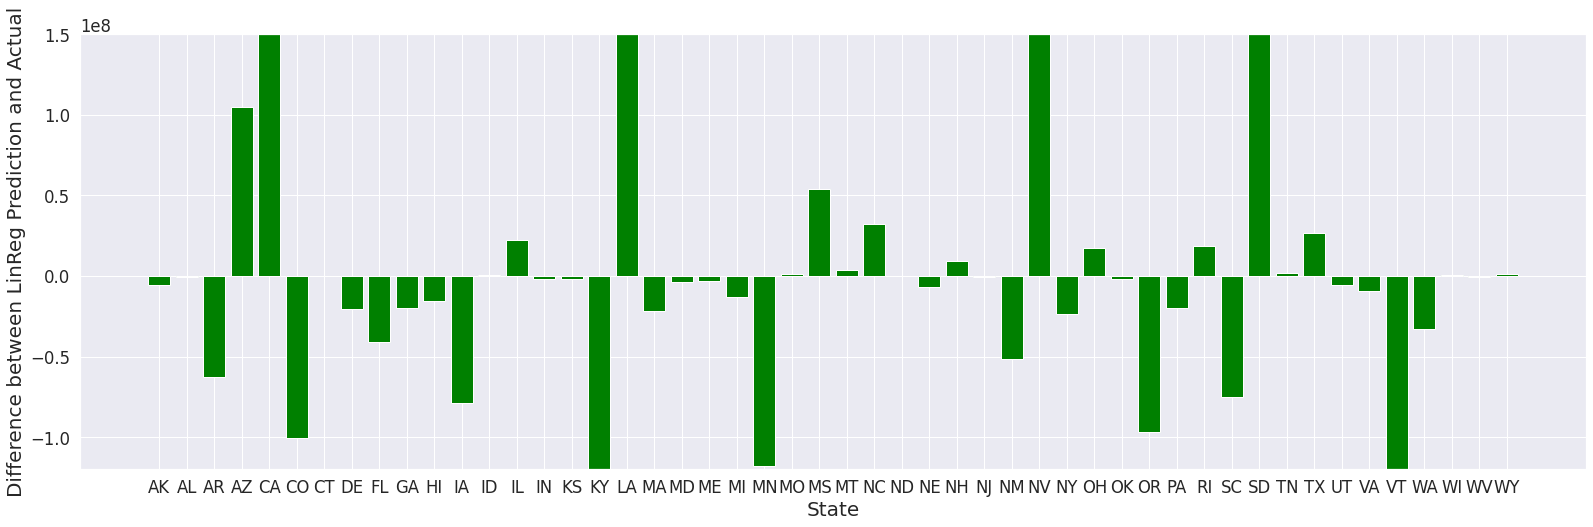

In [100]:
predict = np.array(LIN2020predictions)
act = np.array(actuals20)
residuals_arr = np.subtract(predict,act)
residuals = list(residuals_arr)

plt.figure(figsize=(27, 8))
plt.bar(statecodes.tolist(),residuals, color = "Green")
plt.ylim([-120000000,150000000])
plt.xlabel("State",size=20)
plt.ylabel("Difference between LinReg Prediction and Actual",size=20)

### **Residual Plot for RF**

Text(0, 0.5, 'Difference between Linear Prediction and Actual')

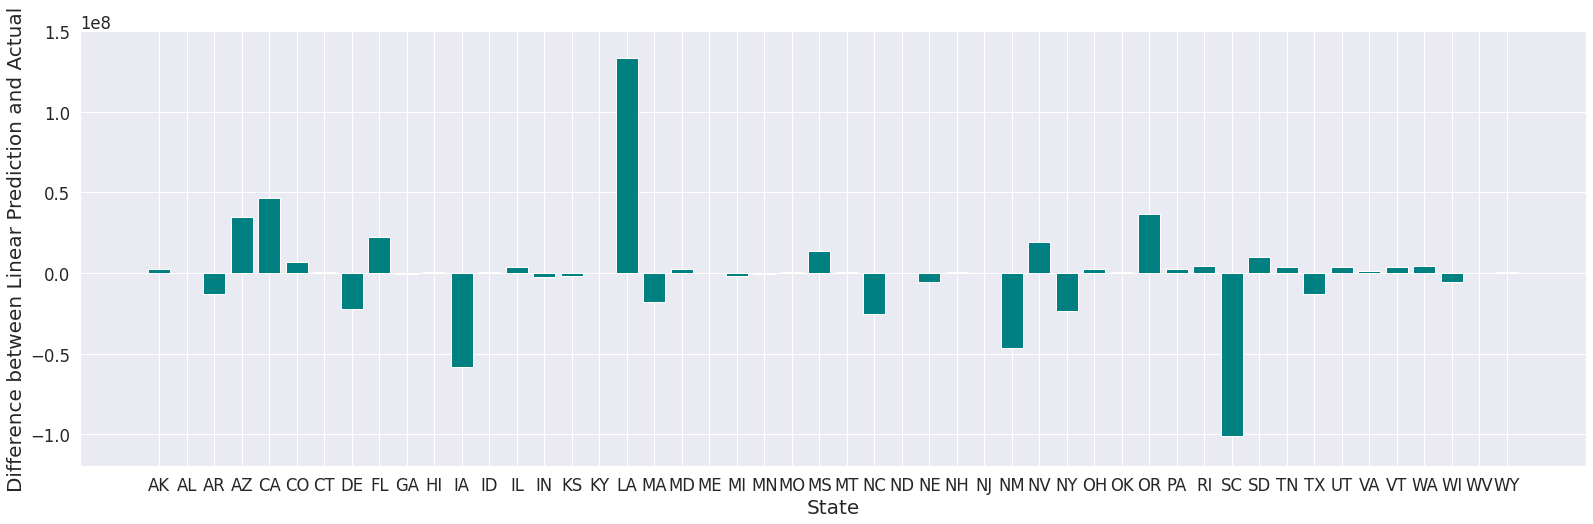

In [101]:
predict = np.array(RF2020predictions)
act = np.array(actuals20)
residuals_arr = np.subtract(predict,act)
residuals = list(residuals_arr)

plt.figure(figsize=(27, 8))
plt.bar(statecodes.tolist(),residuals, color = "Teal")
plt.ylim([-120000000,150000000])
plt.xlabel("State",size=20)
plt.ylabel("Difference between Linear Prediction and Actual",size=20)

### **NC Test Case**

Text(0.5, 0, 'Year')

<Figure size 432x288 with 0 Axes>

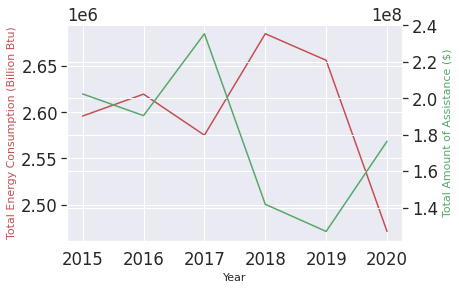

<Figure size 432x288 with 0 Axes>

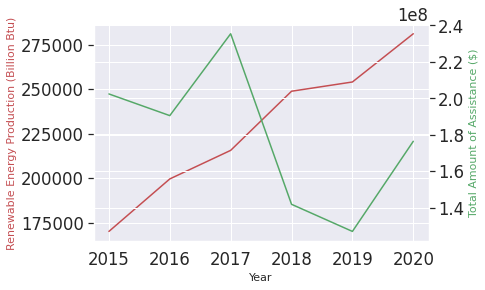

<Figure size 432x288 with 0 Axes>

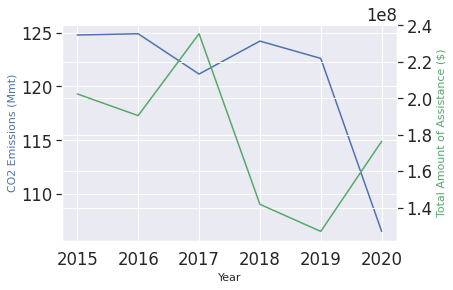

In [102]:
state = "North Carolina"

summary_df = train_df.append(test_df)
#TETCB Plot
state_set = summary_df.query("State == @state and MSN == 'TETCB'")
plt.figure()
figure, axis1 = plt.subplots()
axis2 = axis1.twinx()
axis1.plot(state_set["Year"],state_set["Amount"],color="r")
axis2.plot(state_set["Year"],state_set["TotalAmountofAssistance"],color="g")
axis1.set_ylabel("Total Energy Consumption (Billion Btu)", color = "r",size=11)
axis2.set_ylabel("Total Amount of Assistance ($)", color = "g",size=11)
axis1.set_xlabel("Year",size=11)

#REPRB Plot
state_set = summary_df.query("State == @state and MSN == 'REPRB'")
plt.figure()
figure, axis1 = plt.subplots()
axis2 = axis1.twinx()
axis1.plot(state_set["Year"],state_set["Amount"],color="r")
axis2.plot(state_set["Year"],state_set["TotalAmountofAssistance"],color="g")
axis1.set_ylabel("Renewable Energy Production (Billion Btu)", color = "r",size=11)
axis2.set_ylabel("Total Amount of Assistance ($)", color = "g",size=11)
axis1.set_xlabel("Year",size=11)

#CO2 Plot
plt.figure()
figure, axis1 = plt.subplots()
axis2 = axis1.twinx()
axis1.plot(state_set["Year"],state_set["CO2 Emissions (Mmt)"],color="b")
axis2.plot(state_set["Year"],state_set["TotalAmountofAssistance"],color="g")
axis1.set_ylabel("CO2 Emissions (Mmt)", color = "b",size=11)
axis2.set_ylabel("Total Amount of Assistance ($)", color = "g",size=11)
axis1.set_xlabel("Year",size=11)

# Prediction Visualization

In [103]:
states = gpd.read_file('/content/tl_2022_us_state.shp')
states.sort_values("STUSPS",inplace = True)
non_states = ['VI','MP','GU','AS','PR', 'DC']
for n in non_states:
    states = states[states.STUSPS != n]
states['RFpredictions']= RF2020predictions
states['RIDGEpredictions']= RIDGE2020predictions
states['GBpredictions']= GB2020predictions
states['LINpredictions']= LIN2020predictions
states['actual']= actuals20

non_continental = ['HI', 'AK']
us48 = states
for n in non_continental:
    us48 = us48[us48.STUSPS != n]




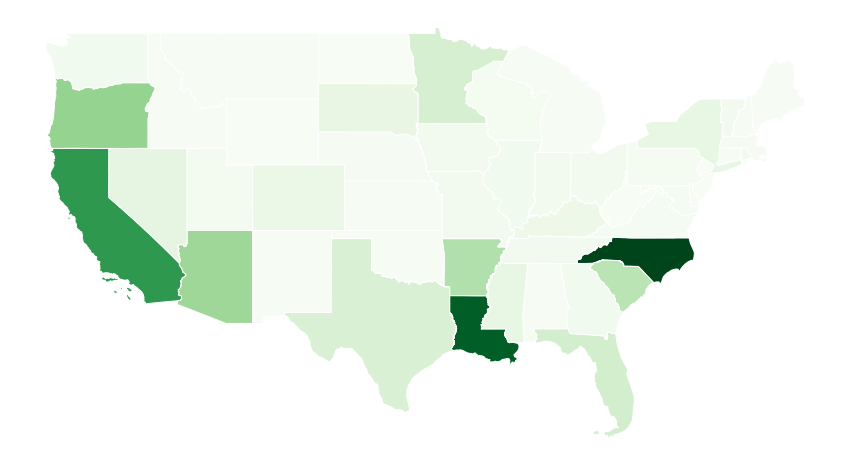

In [104]:
#RFPredicted

us48.crs="EPSG:4326"

RF = us48.plot(column='RFpredictions', cmap = 'Greens', figsize=(15, 15))
RF.set_axis_off()

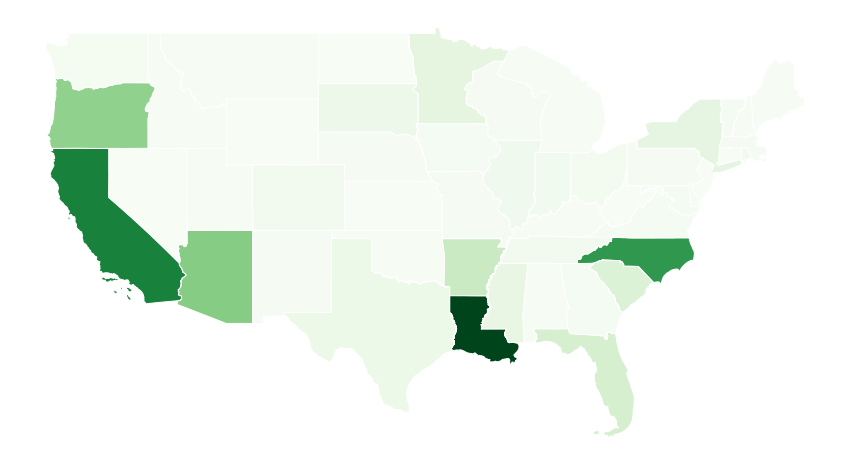

In [105]:
#GB Predictions
GB = us48.plot(column='GBpredictions', cmap = 'Greens', figsize=(15, 15))
GB.set_axis_off()

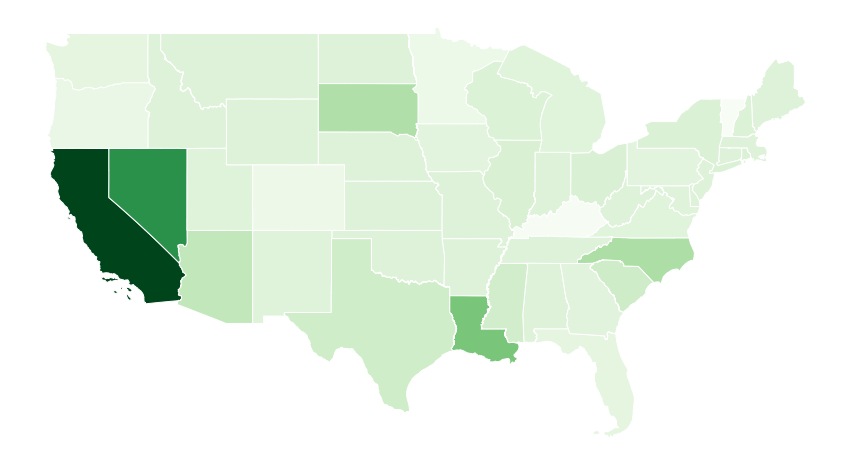

In [106]:
#LIN Predictions
LIN = us48.plot(column='LINpredictions', cmap = 'Greens', figsize=(15, 15))
LIN.set_axis_off()

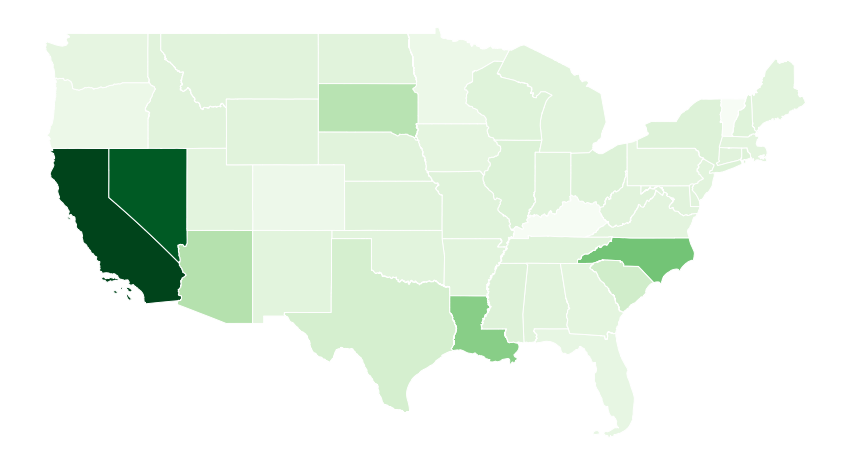

In [107]:
#RIDGEPredictions
RIDGE = us48.plot(column='RIDGEpredictions', cmap = 'Greens', figsize=(15, 15))
RIDGE.set_axis_off()

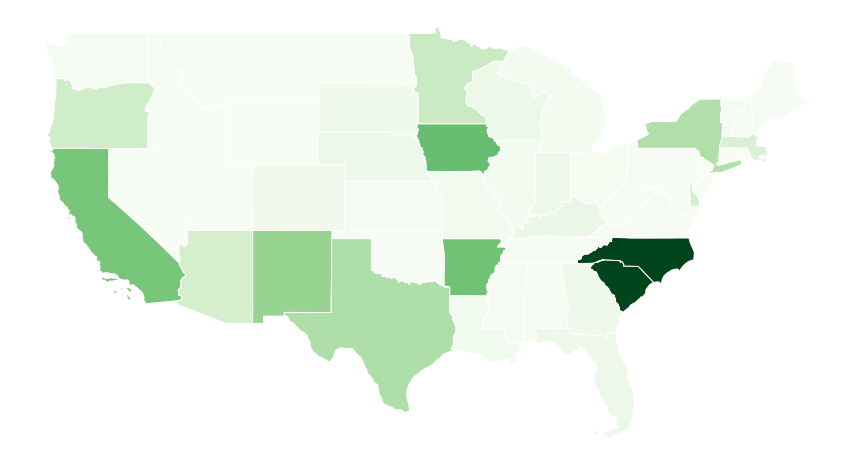

In [108]:
#Actual
actual = us48.plot(column='actual', cmap = 'Greens',  vmax=120000000,  figsize=(15, 15))

actual.set_axis_off()

In [109]:
us48['Top10']= [1 for n in range(48)]
top10correct=['NC','SC', 'MN', 'TX','CA','AR','OR']
top10incorrect=['IA','NM','NY']
us48["Top10"] = us48.apply(lambda x: 0 if (x["STUSPS"] in top10correct) else x["Top10"], axis=1)
us48["Top10"] = us48.apply(lambda x: 2 if (x["STUSPS"] in top10incorrect) else x["Top10"], axis=1)


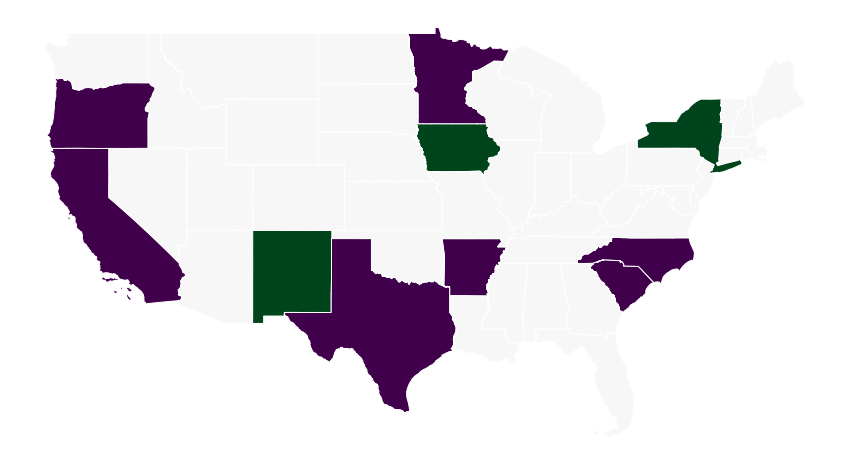

In [110]:
actvpred = us48.plot(column='Top10',categorical = True, cmap= 'PRGn',  figsize=(15, 15))

actvpred.set_axis_off()

## **Predicted Data using Random Forest Model**

In [117]:
final_predict = pd.DataFrame(RF2020predictions, index = statecodes)
final_predict.columns = ["TotalAmountofAssistance"]
final_predict.to_excel("submission_file.xlsx")

    TotalAmountofAssistance
AK             1.216405e+07
AL             1.456907e+06
AR             4.846963e+07
AZ             5.852199e+07
CA             1.050317e+08
CO             1.315614e+07
CT             1.092190e+06
DE             1.278610e+06
FL             3.085352e+07
GA             6.868529e+06
HI             2.043215e+06
IA             5.311083e+06
ID             1.323644e+06
IL             7.321142e+06
IN             5.967503e+06
KS             1.190751e+06
KY             1.119819e+07
LA             1.384349e+08
MA             3.242546e+06
MD             3.669494e+06
ME             1.604699e+06
MI             1.725264e+06
MN             2.890582e+07
MO             5.573455e+06
MS             1.600197e+07
MT             1.428933e+06
NC             1.506634e+08
ND             6.181851e+05
NE             3.369525e+06
NH             1.326466e+06
NJ             4.794188e+05
NM             2.104265e+06
NV             1.909615e+07
NY             1.604456e+07
OH             5.765